## pyMACS plotting capabilities

Showing the SQW4 process calculation from previous notebook.

In [1]:
import numpy as np
import pyMACS
from pyMACS.virtualMACS import VirtualMACS
import mcstasscript as ms
import matplotlib.pyplot as plt
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=True
plt.rcParams['font.size']=10
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='serif'
#This will automatically load in the data files from simulation notebook
macs = VirtualMACS('cri3_experiment',cifName='CrI3.cif',useOld=True)
macs.sample.formula_weight=432.7
numthreads=8
macs.sample.orient_u = [1,0,0]
macs.sample.orient_v = [-1,2,0]

#########################
Old simulations found in /mnt/c/Users/tjh/OneDrive - NIST/GitHub/pyMACS/docs/source/notebooks/cri3_experiment/Kidney_simulations/
 
Successfully combined old simulations into /mnt/c/Users/tjh/OneDrive - NIST/GitHub/pyMACS/docs/source/notebooks/cri3_experiment/Kidney_simulations/cri3_experiment_total.csv

Data matrix instantiated and ready to use.
#########################


Elastic Scattering Slice

Text(0.5, 1.0, 'CrI$_3$ $\\hbar\\omega$=[-1,1] meV')

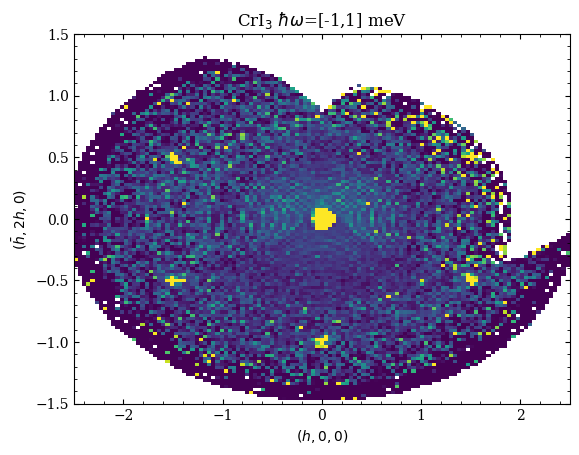

In [2]:
Qu_el, Qv_el, I_el, Err_el = macs.data.take_slice([-2.5,2.5,120],[-1.5,1.5,120],[-1,1],which_data='mcstas')
fig,ax = plt.subplots(1,1)
ax.pcolormesh(Qu_el,Qv_el,I_el.T,vmin=0,vmax=5)
ax.set_xlabel(r'$(h,0,0)$')
ax.set_ylabel(r'$(\bar{h},2h,0)$')
ax.set_title("CrI$_3$ $\hbar\omega$=[-1,1] meV")

Some inelastic constant energy slices, note that the only simulated region in Q-space is what was specified during the generation of the .sqw4 in spinW

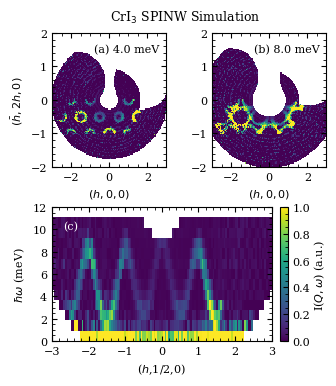

In [3]:
omegas = [2,5,9]
import matplotlib
from matplotlib.gridspec import GridSpec
plt.rcParams['xtick.labelsize']=8
plt.rcParams['ytick.labelsize']=8
fig= plt.figure(figsize=(3.54,4))
fig.suptitle(r"CrI$_3$ SPINW Simulation",fontsize=9,y=0.94)
gs = GridSpec(2,2,width_ratios=[1,1],height_ratios=[1,1.0])
axa = fig.add_subplot(gs[0])
axb = fig.add_subplot(gs[1])
axc = fig.add_subplot(gs[2:4])

fig.subplots_adjust(wspace=0.4,hspace=0.3)

e=4
Qu, Qv, I, Err = macs.data.take_slice([-3,3,120],[-2,2,120],[e-0.5,e+0.5],which_data='mcstas')
axa.pcolormesh(Qu,Qv,I.T,vmin=0,vmax=5e-1,rasterized=True)
axa.set_xlabel(r'$(h,0,0)$',fontsize=8)
axa.set_ylabel(r'$(\bar{h},2h,0)$',fontsize=8)
axa.text(0.65,0.92,f"(a) {e:.1f} meV",fontsize=8,transform=axa.transAxes,verticalalignment='top',horizontalalignment='center')
e=8
Qu, Qv, I, Err = macs.data.take_slice([-3,3,120],[-2,2,120],[e-0.5,e+0.5],which_data='mcstas')
axb.pcolormesh(Qu,Qv,I.T,vmin=0,vmax=5e-1,rasterized=True)
axb.set_xlabel(r'$(h,0,0)$',fontsize=8)

H,E,I,Err=macs.data.take_slice([-3,3,120],[-0.6,-0.4],[0,12,14])
mesh = axc.pcolormesh(H,E,2*I.T,vmin=0,vmax=2*5e-1,rasterized=True)
axc.set_xlabel(r"($h$,1/2,0)",fontsize=8)
axc.set_ylabel(r"$\hbar\omega$ (meV)",fontsize=8)

#axb.set_ylabel(r'$(\bar{h},2h,0)$')
axb.text(0.65,0.92,f"(b) {e:.1f} meV",fontsize=8,transform=axb.transAxes,verticalalignment='top',horizontalalignment='center')
axc.text(0.05,0.9,"(c)",fontsize=8,transform=axc.transAxes,verticalalignment='top',horizontalalignment='left',color='w')
l,b,w,h = axc.get_position().bounds

#Make color bar
l,b,w,h=axc.get_position().bounds
cax_a = fig.add_axes([l+w-0.13,b,0.02,h])
labelstr='I($Q,\omega$) (a.u.)'
cbar_a = plt.colorbar(mesh,orientation='vertical',cax=cax_a)
cax_a.text(5.5,0.5,labelstr,transform=cax_a.transAxes,horizontalalignment='center',verticalalignment='center',
        rotation=90,fontsize=8)
cax_a.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.1f"))
cax_a.tick_params(labelleft=False,labelright=True,labelsize=8)
cax_a.set_xticks([])

axc.set_position([l,b,w*0.8,h])

fig.savefig("CrI3_mcstas.pdf",bbox_inches='tight',dpi=300)

Example dispersion plot

Text(0.5, 1.0, 'CrI$_3$ Dispsersion, ($\\bar{h}$,2$h$,0)=[-0.6,-0.4]')

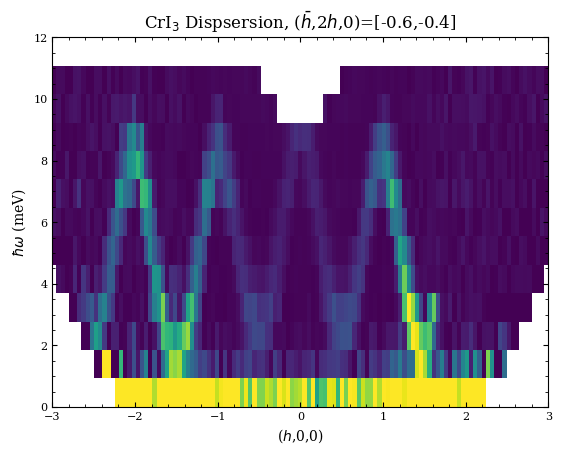

In [4]:
fig,ax = plt.subplots(1,1)
H,E,I,Err=macs.data.take_slice([-3,3,120],[-0.6,-0.4],[0,12,14])
ax.pcolormesh(H,E,I.T,vmin=0,vmax=5e-1)
ax.set_xlabel(r"($h$,0,0)")
ax.set_ylabel(r"$\hbar\omega$ (meV)")
ax.set_title("CrI$_3$ Dispsersion, ("+r"$\bar{h}$,2$h$,0)=[-0.6,-0.4]")


Finally, example of a cut.

Text(0.5, 1.0, 'CrI$_3$ $(h00)$=[0.45,0.55], $(\\bar{h},2h,0)$=[-0.55,-0.45]')

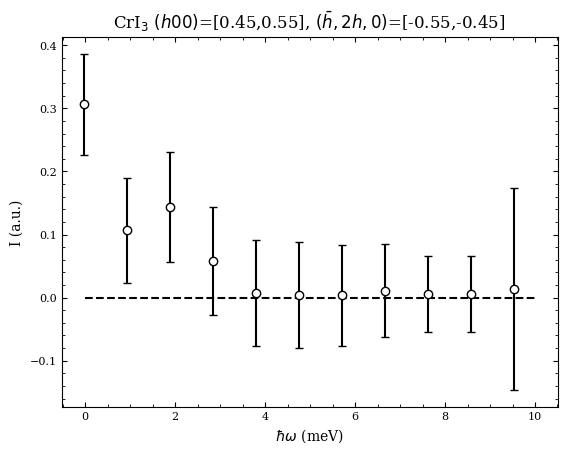

In [5]:
e,I,err = macs.data.take_cut([0.45,0.55],[-0.55,-0.45],[-0.5,10,12])
fig,ax = plt.subplots(1,1)
ax.errorbar(e,I,err,ls=' ',mfc='w',mec='k',color='k',capsize=3,marker='o')
ax.plot(np.linspace(0,10,1000),np.zeros(1000),'k--')
ax.set_xlabel("$\hbar\omega$ (meV)")
ax.set_ylabel("I (a.u.)")
ax.set_title(r"CrI$_3$ $(h00)$=[0.45,0.55], $(\bar{h},2h,0)$=[-0.55,-0.45]")

In [6]:
macs.kidney.Ef

5.0